In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [19]:
url="https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx"

In [20]:
dataset=pd.read_excel(url)

In [21]:
dataset

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,n.d.,n.d.,0,n.d.,n.d.,1500,n.d.,...,28599,8175,18615,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7920,8021,company8021,80757,n.d.,n.d.,0,n.d.,n.d.,1500,n.d.,...,28600,8176,18616,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7921,8022,company8022,74478,n.d.,n.d.,7000,n.d.,n.d.,2529,n.d.,...,28601,8177,18617,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7922,8023,company8023,0,n.d.,n.d.,0,n.d.,n.d.,0,n.d.,...,28602,8178,18618,5253,n.d.,n.d.,303714,n.d.,n.d.,Produ


In [22]:
print(dataset.dtypes)
print(dataset.columns)

index               int64
Ragione sociale    object
costi anno 2020     int64
var1               object
var2               object
                    ...  
var155             object
var156              int64
var157             object
var158             object
var159             object
Length: 171, dtype: object
Index(['index', 'Ragione sociale', 'costi anno 2020', 'var1', 'var2', 'var3',
       'var4', 'var5', 'var6', 'var7',
       ...
       'Numero CCIAA', 'Codice fiscale', 'Partita IVA', 'var153', 'var154',
       'var155', 'var156', 'var157', 'var158', 'var159'],
      dtype='object', length=171)


In [23]:
correlation_matrix = dataset.corr()


ValueError: could not convert string to float: 'company101'

In [ ]:
print(correlation_matrix)

NameError: name 'correlation_matrix' is not defined

In [ ]:
print(dataset.dtypes)
print(dataset.columns)

index               int64
Ragione sociale    object
costi anno 2020     int64
var1               object
var2               object
                    ...  
var155             object
var156              int64
var157             object
var158             object
var159             object
Length: 171, dtype: object
Index(['index', 'Ragione sociale', 'costi anno 2020', 'var1', 'var2', 'var3',
       'var4', 'var5', 'var6', 'var7',
       ...
       'Numero CCIAA', 'Codice fiscale', 'Partita IVA', 'var153', 'var154',
       'var155', 'var156', 'var157', 'var158', 'var159'],
      dtype='object', length=171)


In [ ]:
numeric_df = dataset.select_dtypes(include=[np.number])

In [ ]:
correlation_matrix = numeric_df.corr()

In [24]:
print(correlation_matrix)

NameError: name 'correlation_matrix' is not defined

In [ ]:
correlation_with_costs = correlation_matrix['costi anno 2020'].sort_values(ascending=False)

In [ ]:
print(correlation_with_costs.head(10))

costi anno 2020    1.000000
var93              0.998308
var99              0.959726
var30              0.893191
var34              0.869460
var33              0.866085
var35              0.860851
var102             0.841729
var84              0.833652
var86              0.830214
Name: costi anno 2020, dtype: float64


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np


X = numeric_df[['var93', 'var99', 'var30','var34','var33','var35','var102','var84','var86']]
Y = numeric_df['costi anno 2020']


model = LinearRegression()
model.fit(X, Y)


coefficients = model.coef_
intercept = model.intercept_


print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [ 0.95166775  0.04266143 -0.19003019 -0.03544685  0.28387037 -0.03402557
  0.09305585 -0.04526835 -0.01071224]
Intercept: -2532.3207867015153


In [ ]:
r_squared = model.score(X, Y)
print('R-squared:', r_squared)

R-squared: 0.9971048794436456


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
pairplot = sns.pairplot(numeric_df[['costi anno 2020', 'var93', 'var99', 'var30']]) 
pairplot_file = 'pairplot_costs_2020.jpeg'
plt.savefig(pairplot_file)
plt.close() 

pairplot_file

'pairplot_costs_2020.jpeg'

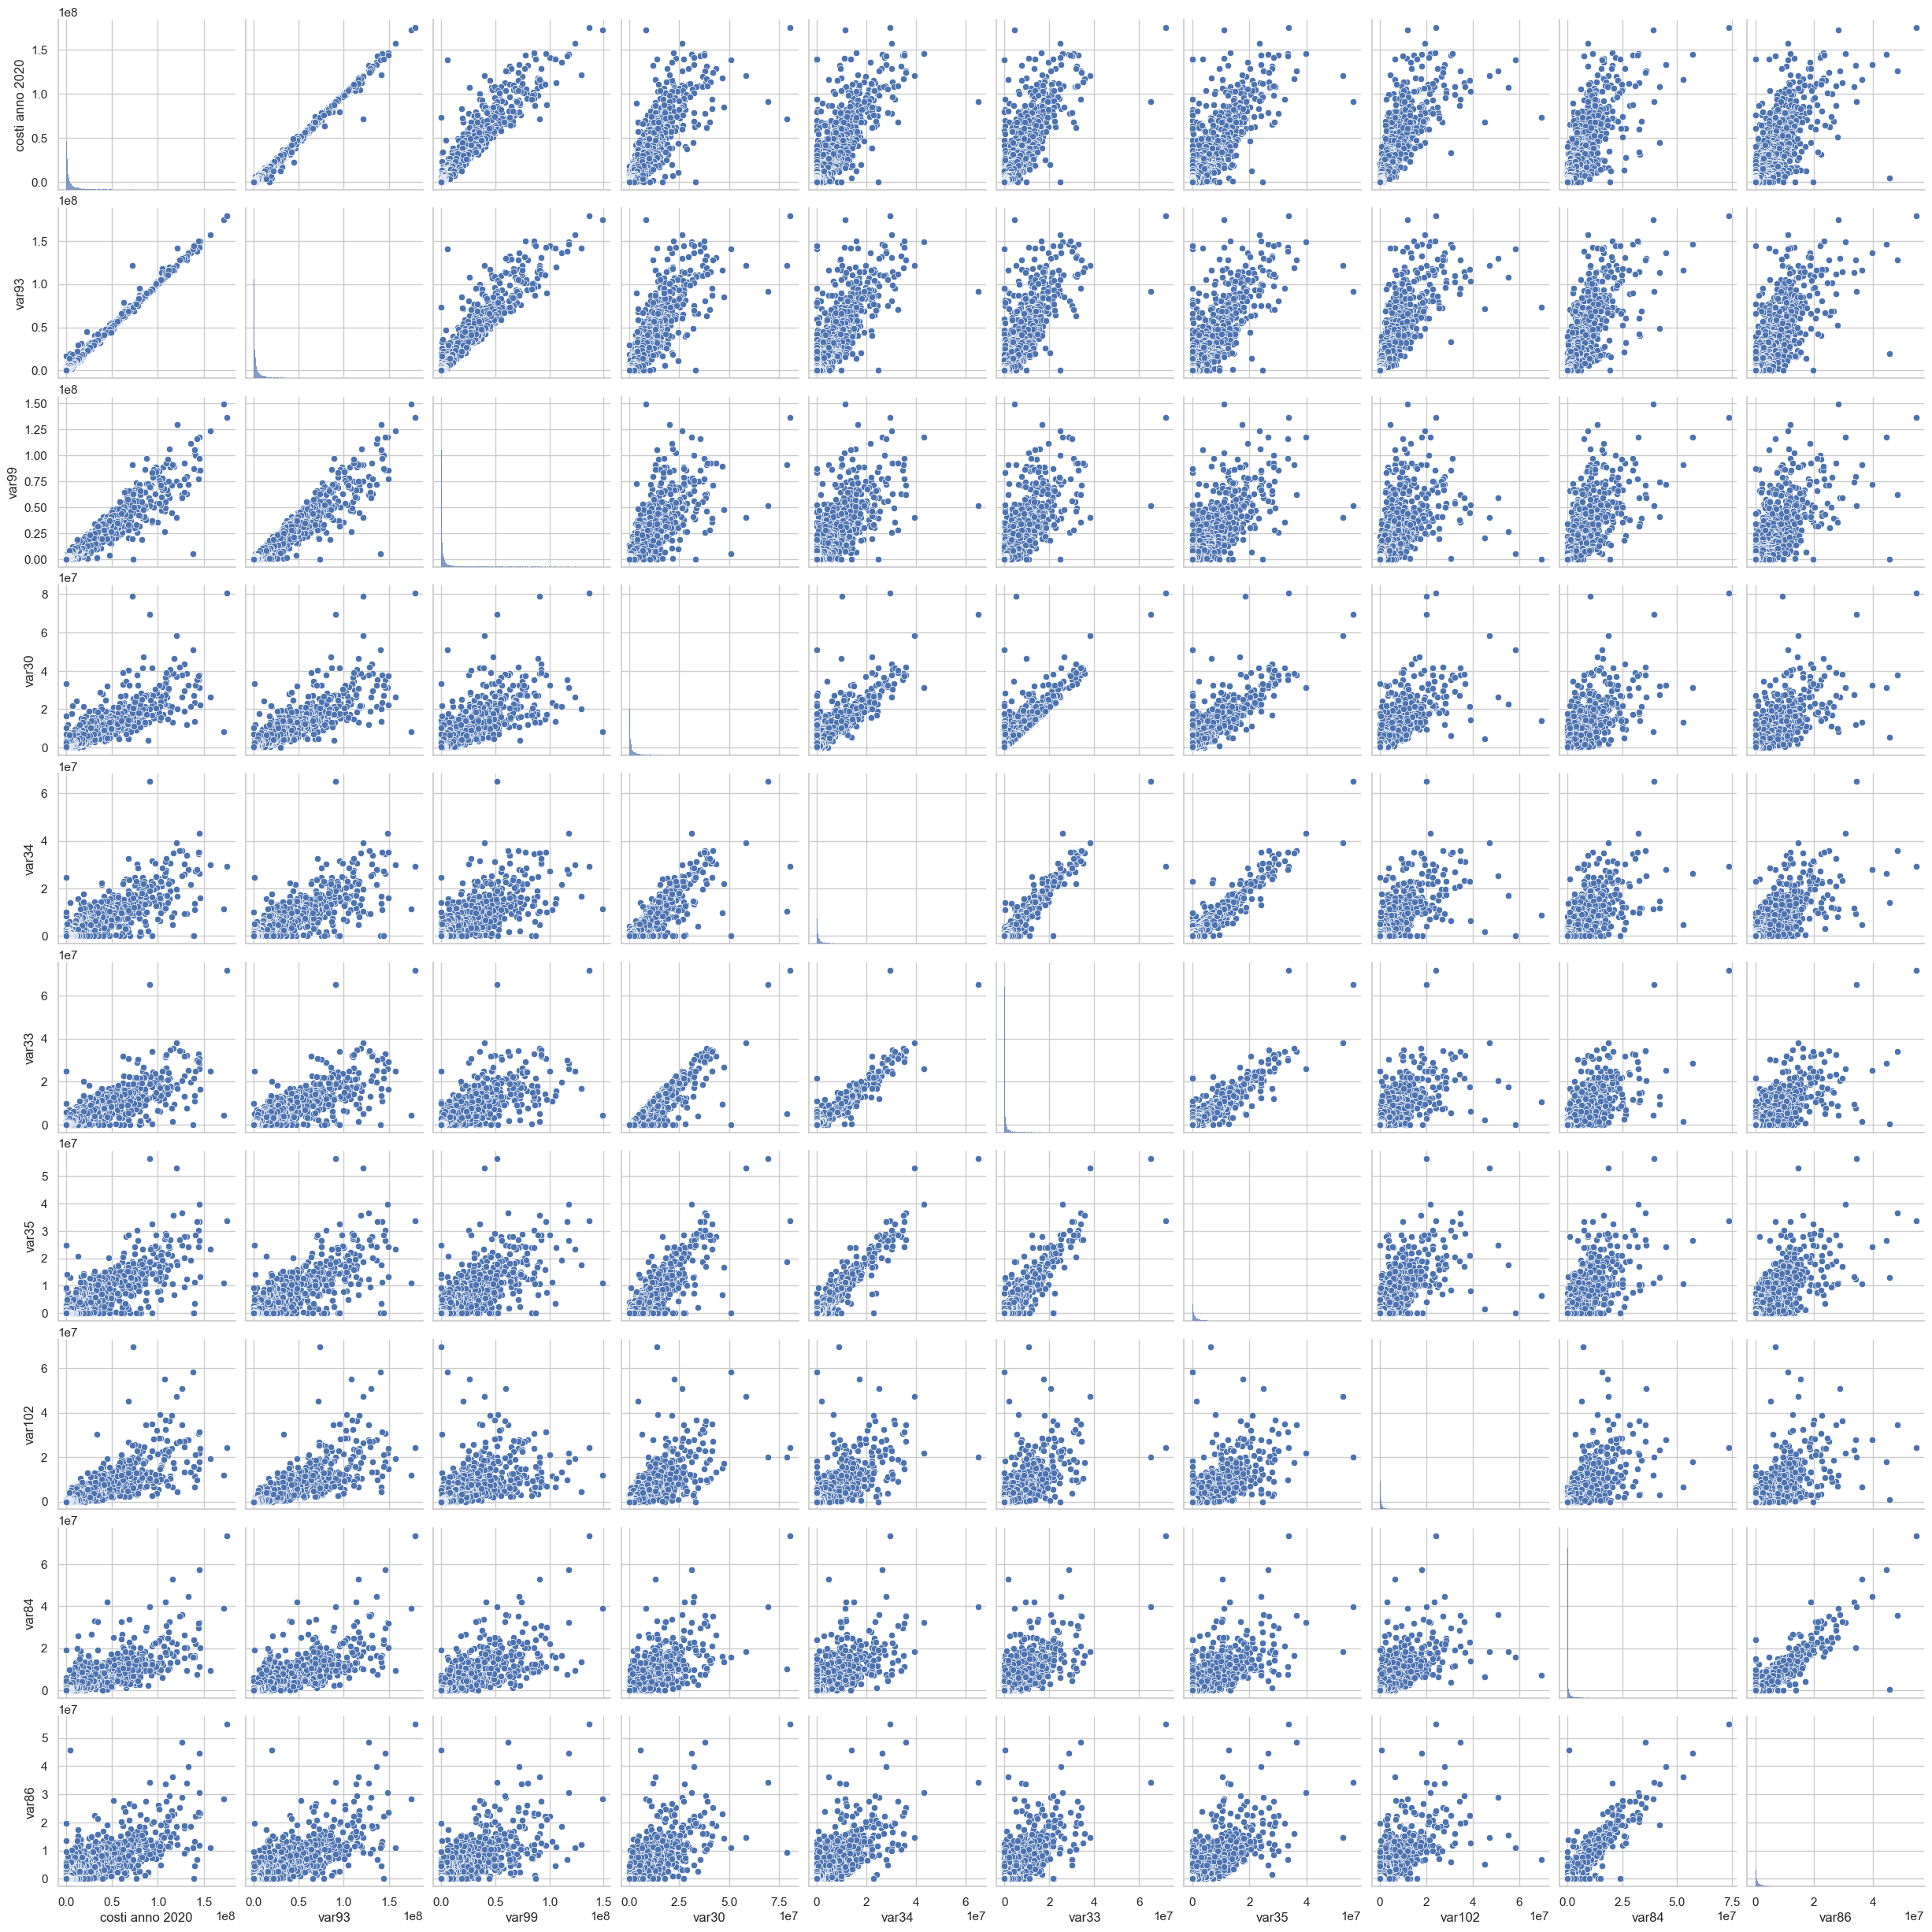

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(numeric_df[['costi anno 2020', 'var93', 'var99', 'var30','var34','var33','var35','var102','var84','var86']]) 

ValueError: Format 'html' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

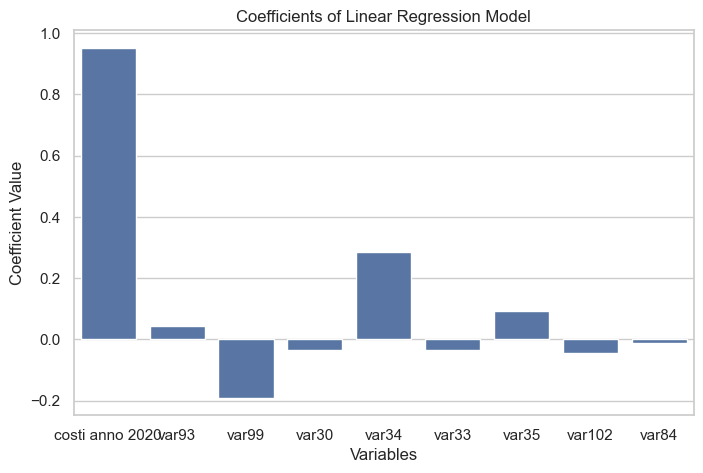

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=['costi anno 2020', 'var93', 'var99', 'var30','var34','var33','var35','var102','var84',], y=model.coef_)
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Variables')
plt.ylabel('Coefficient Value')

coefficients_plot_file = 'coefficients_plot.html'
plt.savefig(coefficients_plot_file)
plt.close() 

coefficients_plot_file

ValueError: Format 'html' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

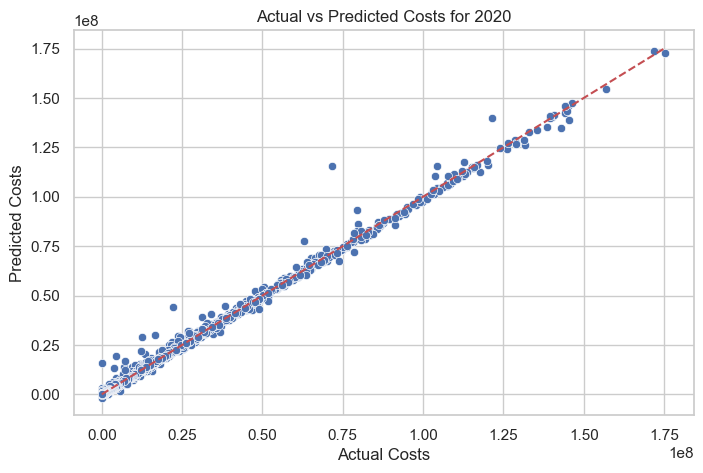

In [ ]:
predicted_costs = model.predict(X)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=Y, y=predicted_costs)
plt.title('Actual vs Predicted Costs for 2020')
plt.xlabel('Actual Costs')
plt.ylabel('Predicted Costs')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--') 

scatter_plot_file = 'actual_vs_predicted_costs.html'
plt.savefig(scatter_plot_file)
plt.close()  

scatter_plot_file

In [ ]:

import joblib
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)


model_filename

'linear_regression_model.pkl'

In [ ]:
print(model_filename)

linear_regression_model.pkl


In [ ]:
import statsmodels.api as sm

# Adding a constant to the model for intercept
X_with_const = sm.add_constant(X)

# Fitting the model using statsmodels to get detailed statistics
model_sm = sm.OLS(Y, X_with_const).fit()

# Getting the summary of the model
model_summary = model_sm.summary()

# Displaying the summary of the model
model_summary

ModuleNotFoundError: No module named 'statsmodels'